In [3]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [4]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from deep_visual_odometry.kitti_utils import KITTIdata
from matplotlib import pyplot as plt
import pickle

In [5]:
basedir = 'dataset'

In [6]:
from deep_visual_odometry.odometry_model import OdomModel

In [7]:
batch_size = 128         # Sequences per batch
num_steps = 16         # Number of sequence steps per batch
rnn_size = 128          # Size of hidden layers in rnn_cell
num_layers = 1           # Number of hidden layers
learning_rate = 0.001   #learning rate

In [8]:
kitti_data = KITTIdata(basedir, 
                       sequences = ['00', '01', '02', '03','04','05','06','07','08'],
                       sequence_len = num_steps,
                       val_frac = 0,
                       test_frac = 0,
                       img_size=(150,50))

completed load sequence 00 data
completed load sequence 01 data
completed load sequence 02 data
completed load sequence 03 data
completed load sequence 04 data
completed load sequence 05 data
completed load sequence 06 data
completed load sequence 07 data
completed load sequence 08 data


In [13]:
kitti_data.normalize()

normalized data


In [62]:
model = OdomModel(batch_size = batch_size, 
                  num_steps = num_steps,
                  cell_type = 'LSTM',
                  rnn_size = rnn_size,
                  num_layers = num_layers,
                  learning_rate = learning_rate)
LSTM_loss = model.train(kitti_data, max_count = 1500, save_every_n = 500, sequences = ['00', '02', '05', '08'])

output size (128, 16, 128)
seq_output shape (128, 16, 128)
shape of outputs (128, 16, 3)
shape of targets (128, 16, 3)
step: 25  loss: 0.3983  0.6675 sec/batch
step: 50  loss: 0.2978  0.6676 sec/batch
step: 75  loss: 0.2456  0.5912 sec/batch
step: 100  loss: 0.2180  0.5406 sec/batch
step: 125  loss: 0.1814  0.5477 sec/batch
step: 150  loss: 0.1780  0.5413 sec/batch
step: 175  loss: 0.1672  0.5471 sec/batch
step: 200  loss: 0.1600  0.5343 sec/batch
step: 225  loss: 0.1536  0.5276 sec/batch
step: 250  loss: 0.1434  0.5280 sec/batch
step: 275  loss: 0.1419  0.8800 sec/batch
step: 300  loss: 0.1336  0.6028 sec/batch
step: 325  loss: 0.1354  0.5554 sec/batch
step: 350  loss: 0.1418  0.5649 sec/batch
step: 375  loss: 0.1354  0.5582 sec/batch
step: 400  loss: 0.1239  0.6086 sec/batch
step: 425  loss: 0.1167  0.6005 sec/batch
step: 450  loss: 0.1304  0.5895 sec/batch
step: 475  loss: 0.1203  0.5383 sec/batch
step: 500  loss: 0.1220  0.5161 sec/batch
step: 525  loss: 0.1160  0.5096 sec/batch
st

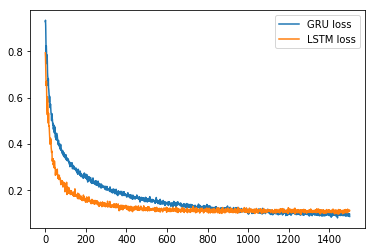

In [63]:
plt.plot(loss,label = 'GRU loss')
plt.plot(LSTM_loss,label = 'LSTM loss')
plt.legend()

In [18]:
model = OdomModel(batch_size = batch_size, 
                  num_steps = num_steps,
                  cell_type = 'LSTM',
                  rnn_size = rnn_size,
                  num_layers = num_layers,
                  learning_rate = learning_rate,
                  sampling = True)

output size (1, 1, 128)
seq_output shape (1, 1, 128)
shape of outputs (1, 1, 3)
shape of targets (1, 1, 3)


In [19]:
inputs, inter_inputs, targets = kitti_data.get_full_sequence(sequence = '00')
inter_inputs.shape

(4540, 5)

In [20]:
checkpoint = tf.train.latest_checkpoint('checkpoints')
predictions = model.test(checkpoint, inter_inputs, priming_len = inter_inputs.shape[0])
predictions.shape

INFO:tensorflow:Restoring parameters from checkpoints/i1501_l128.ckpt


(4540, 3)

In [21]:
predictions = predictions*kitti_data.pose_std+kitti_data.pose_mean
targets = targets*kitti_data.pose_std+kitti_data.pose_mean

Text(0,0.5,'y')

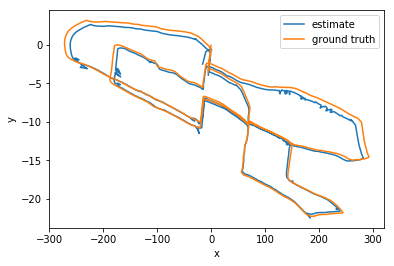

In [22]:
plt.plot(predictions[:,0],predictions[:,1],label = 'estimate')
plt.plot(targets[:,0],targets[:,1],label = 'ground truth')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [23]:
error_x = np.linalg.norm(predictions[:,0]-targets[:,0])/targets.shape[0]
error_y = np.linalg.norm(predictions[:,1]-targets[:,1])/targets.shape[0] 
error_theta = np.linalg.norm(predictions[:,2]-targets[:,2])/targets.shape[0] 
print(f'error for x: {error_x} m')
print(f'error for y: {error_y} m')
print(f'error for x: {error_theta} rad')


error for x: 0.07630831470283668 m
error for y: 0.004580583308303783 m
error for x: 0.007876636172928265 rad


In [24]:
inputs, inter_inputs, targets = kitti_data.get_full_sequence(sequence = '07')
inter_inputs.shape

(1100, 5)

In [25]:
checkpoint = tf.train.latest_checkpoint('checkpoints')
predictions = model.test(checkpoint, inter_inputs, priming_len = inter_inputs.shape[0])
predictions.shape

INFO:tensorflow:Restoring parameters from checkpoints/i1501_l128.ckpt


(1100, 3)

In [26]:
predictions = predictions*kitti_data.pose_std+kitti_data.pose_mean
targets = targets*kitti_data.pose_std+kitti_data.pose_mean

Text(0,0.5,'y')

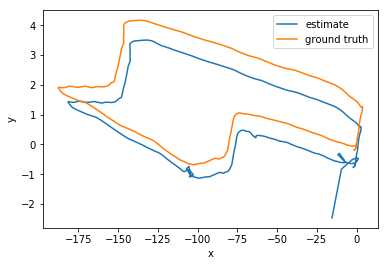

In [27]:
plt.plot(predictions[:,0],predictions[:,1],label = 'estimate')
plt.plot(targets[:,0],targets[:,1],label = 'ground truth')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [28]:
error_x = np.linalg.norm(predictions[:,0]-targets[:,0])/targets.shape[0]
error_y = np.linalg.norm(predictions[:,1]-targets[:,1])/targets.shape[0] 
error_theta = np.linalg.norm(predictions[:,2]-targets[:,2])/targets.shape[0] 
print(f'error for x: {error_x} m')
print(f'error for y: {error_y} m')
print(f'error for x: {error_theta} rad')


error for x: 0.10580874294500439 m
error for y: 0.017802322517528092 m
error for x: 0.005953561474835815 rad


In [29]:
inputs, inter_inputs, targets = kitti_data.get_full_sequence(sequence = '06')
inter_inputs.shape

(1100, 5)

In [30]:
checkpoint = tf.train.latest_checkpoint('checkpoints')
predictions = model.test(checkpoint, inter_inputs, priming_len = inter_inputs.shape[0])
predictions.shape

INFO:tensorflow:Restoring parameters from checkpoints/i1501_l128.ckpt


(1100, 3)

In [31]:
predictions = predictions*kitti_data.pose_std+kitti_data.pose_mean
targets = targets*kitti_data.pose_std+kitti_data.pose_mean

Text(0,0.5,'y')

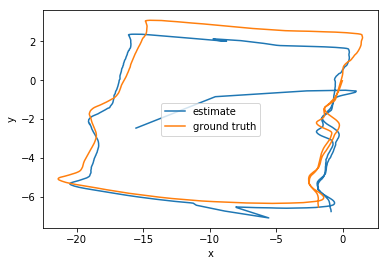

In [32]:
plt.plot(predictions[:,0],predictions[:,1],label = 'estimate')
plt.plot(targets[:,0],targets[:,1],label = 'ground truth')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [33]:
error_x = np.linalg.norm(predictions[:,0]-targets[:,0])/targets.shape[0]
error_y = np.linalg.norm(predictions[:,1]-targets[:,1])/targets.shape[0] 
error_theta = np.linalg.norm(predictions[:,2]-targets[:,2])/targets.shape[0] 
print(f'error for x: {error_x} m')
print(f'error for y: {error_y} m')
print(f'error for x: {error_theta} rad')


error for x: 0.02855048516357047 m
error for y: 0.014711202486260778 m
error for x: 0.0017715975248402654 rad
